In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
#import matplotlib.pyplot as plt

#import pandas_profiling as pp

In [2]:
#changing os

os.chdir(r'D:\1_Metro College\Courses\DSP-Python\Class\Data')

#reading Data sets

train = pd.read_csv('Store_Train_Forecast_Class.csv')
test = pd.read_csv('Store_Test_Forecast_Class.csv')



In [3]:
#Combining datasets

train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train,test],ignore_index=True,sort=True)#sort - to try to keep it normalized as possible

print('train: ',train.shape,'test: ',test.shape,'combined: ',data.shape)

train:  (8523, 13) test:  (5681, 12) combined:  (14204, 13)


In [4]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train


In [5]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test


## First observations

In [6]:
data.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


## Last observations

In [7]:
data.tail(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
14199,Regular,FDB58,141.3154,NaN,Snack Foods,0.013496,10.5,1997,OUT046,Tier 1,Small,Supermarket Type1,test
14200,Regular,FDD47,169.1448,NaN,Starchy Foods,0.142991,7.6,2009,OUT018,Tier 3,Medium,Supermarket Type2,test
14201,Low Fat,NCO17,118.7440,NaN,Health and Hygiene,0.073529,10.0,2002,OUT045,Tier 2,NaN,Supermarket Type1,test
14202,Regular,FDJ26,214.6218,NaN,Canned,0.000000,15.3,2007,OUT017,Tier 2,NaN,Supermarket Type1,test
14203,Regular,FDU37,79.7960,NaN,Canned,0.104720,9.5,2002,OUT045,Tier 2,NaN,Supermarket Type1,test


In [8]:
data.describe()#include='all' #Just numerical statistical summary

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


## Finding missing values

In [9]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

# UDF

In [10]:
def chck_miss(df):

    Total = df.isnull().count().sort_values(ascending=True)        
    Missing = df.isnull().sum().sort_values(ascending=True)   

    Percentage_Miss = round((Missing/Total)*100,2)

    Summary = pd.concat([Total,Missing, Percentage_Miss],axis=1,keys=['Total','# Missing','% Missing'],sort=True)
          
    print('Are there any missing value?')                    
    print(Summary)         

    del Total, Missing, Percentage_Miss, Summary 

In [11]:
chck_miss(data)

Are there any missing value?
                           Total  # Missing  % Missing
Item_Fat_Content           14204          0       0.00
Item_Identifier            14204          0       0.00
Item_MRP                   14204          0       0.00
Item_Outlet_Sales          14204       5681      40.00
Item_Type                  14204          0       0.00
Item_Visibility            14204          0       0.00
Item_Weight                14204       2439      17.17
Outlet_Establishment_Year  14204          0       0.00
Outlet_Identifier          14204          0       0.00
Outlet_Location_Type       14204          0       0.00
Outlet_Size                14204       4016      28.27
Outlet_Type                14204          0       0.00
source                     14204          0       0.00


## Checking unique values

In [12]:
def uniq(df):
    print(df.apply(lambda x: len(x.unique())),'\n')
    for i in df.columns:
         if type(df.loc[0, i]) == str: #checking type of features
                print(i,' categories: ',df[i].unique(),'\n')
               # for col in df[i]:#
               #     print('\nFrequency of Categories for %s'%col,'\n', df[col].value_counts(),'\n') #%s = placeholder

In [13]:
uniq(data)

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64 

Item_Fat_Content  categories:  ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

Item_Identifier  categories:  ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

Item_Type  categories:  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Identifier  categories:  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

O

## Data Information

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           14204 non-null  object 
 1   Item_Identifier            14204 non-null  object 
 2   Item_MRP                   14204 non-null  float64
 3   Item_Outlet_Sales          8523 non-null   float64
 4   Item_Type                  14204 non-null  object 
 5   Item_Visibility            14204 non-null  float64
 6   Item_Weight                11765 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Identifier          14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Size                10188 non-null  object 
 11  Outlet_Type                14204 non-null  object 
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [15]:
cat_cols = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#exclude ID cols and source
cat_cols = [x for x in cat_cols if x not in ['Item_Identifier ','Outlet_Identifier ','source']]

#print freq
for col in cat_cols:
    print('\nFrequency of Categories for %s'%col,'\n', data[col].value_counts()) #%s = placeholder


Frequency of Categories for Item_Fat_Content 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for Item_Identifier 
 FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for Item_Type 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for Outlet_Identifier 
 OUT027

## Data visual

In [16]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source'],
      dtype='object')

### Univariate

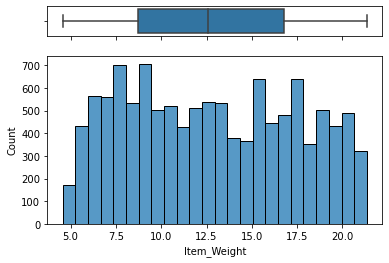

In [17]:
fig, (ax_box, ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.histplot(data=data,x='Item_Weight',ax=ax_hist)
sns.boxplot(x=data['Item_Weight'],ax=ax_box)
ax_box.set(xlabel='')
plt.show()

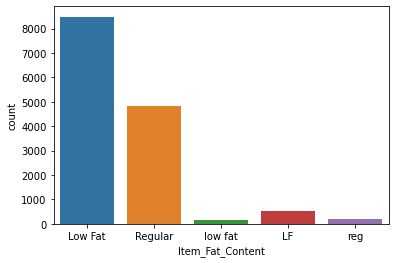

In [88]:
fig,ax = plt.subplots()
sns.countplot(x='Item_Fat_Content',data=data )
plt.show()

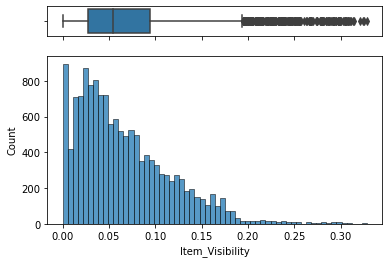

In [19]:
fig, (ax_box,ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={"height_ratios":(.15,.85)})
sns.histplot(data=data,x='Item_Visibility',ax=ax_hist)
sns.boxplot(data=data,x='Item_Visibility',ax=ax_box)
ax_box.set(xlabel='')
plt.show()

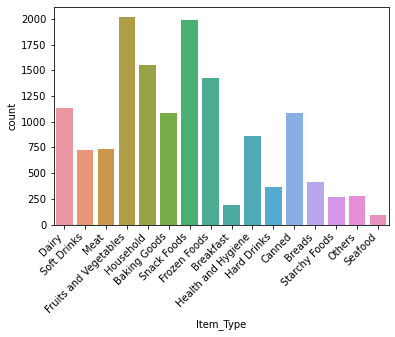

In [87]:
sns.countplot(data=data,x='Item_Type')
plt.xticks(rotation=45, ha='right')  
plt.show()

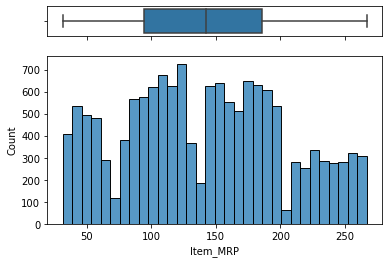

In [21]:
fig,(ax_box,ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(.15,.85)})
sns.boxplot(data=data,x='Item_MRP',ax=ax_box)
sns.histplot(data=data,x='Item_MRP',ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

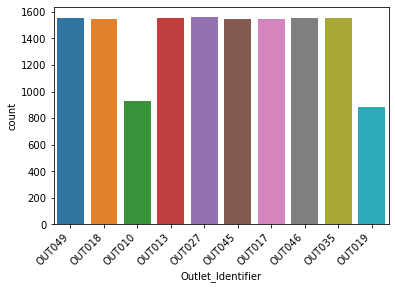

In [86]:
sns.countplot(data=data,x='Outlet_Identifier')
plt.xticks(rotation=45,ha='right')
plt.show()

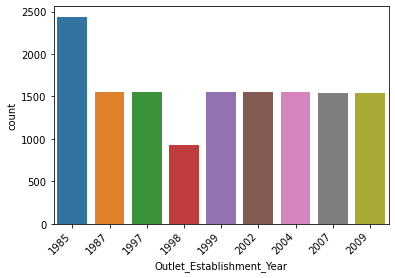

In [85]:
sns.countplot(data=data,x='Outlet_Establishment_Year')
plt.xticks(rotation=45,ha='right')
plt.show()

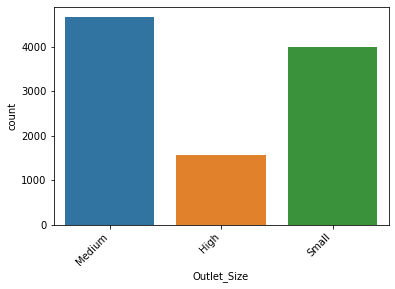

In [84]:
sns.countplot(data=data,x='Outlet_Size')
plt.xticks(rotation=45,ha='right')
plt.show()

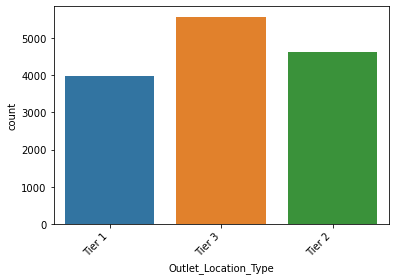

In [89]:
sns.countplot(data=data,x='Outlet_Location_Type')
plt.xticks(rotation=45,ha='right')
plt.show()

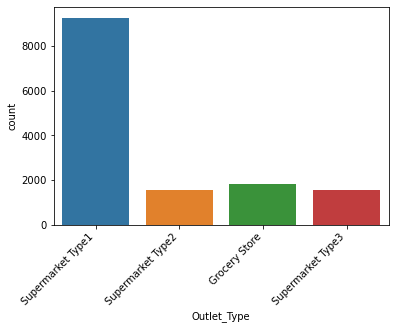

In [83]:
sns.countplot(data=data,x='Outlet_Type')
plt.xticks(rotation=45,ha='right')
plt.show()

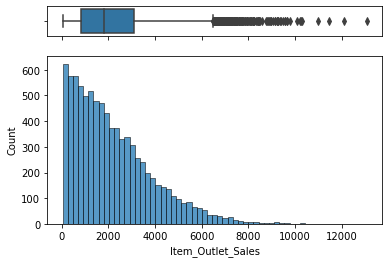

In [26]:
fig,(ax_box,ax_hist) = plt.subplots(2,sharex=True,gridspec_kw={'height_ratios':(.15,.85)})
sns.histplot(data=data,x='Item_Outlet_Sales',ax=ax_hist)
sns.boxplot(data=data,x='Item_Outlet_Sales',ax=ax_box )
ax_box.set(xlabel='')
plt.show()

### Bivariate

In [35]:
target = 'Item_Outlet_Sales'

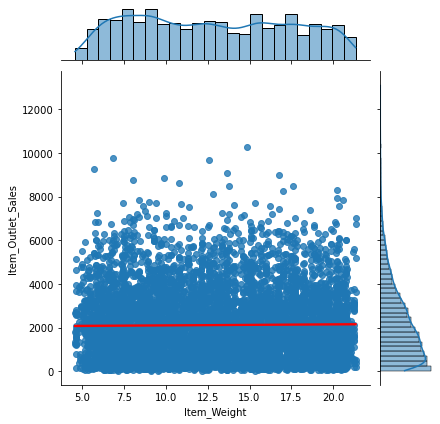

In [61]:
sns.jointplot(data=data,x='Item_Weight',y=target,kind='reg',joint_kws={'line_kws':{'color':'red'}})
plt.show()

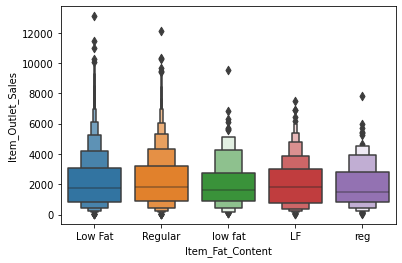

In [107]:
sns.boxenplot(data=data,y=target,x='Item_Fat_Content')
plt.show()

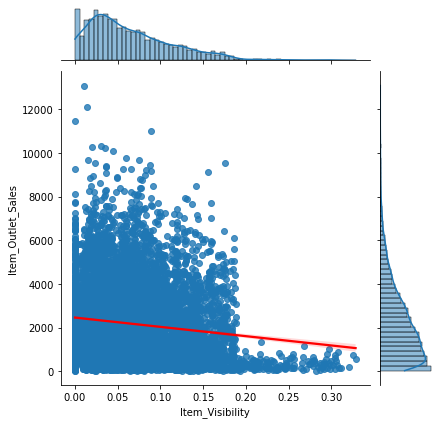

In [60]:
sns.jointplot(data=data,x='Item_Visibility',y=target,kind='reg',joint_kws={'line_kws':{'color':'red'}})
plt.show()

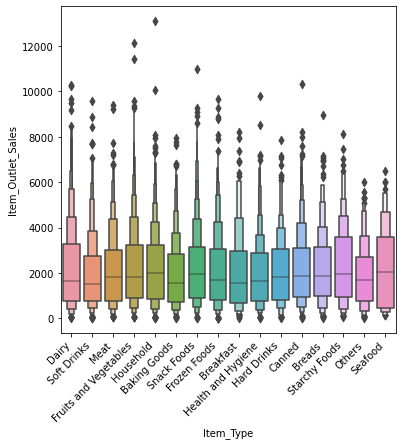

In [109]:
fig,ax= plt.subplots()
fig.set_size_inches(6,6)
sns.boxenplot(data=data,y=target,x="Item_Type")
plt.xticks(rotation=45,ha='right')
plt.show()

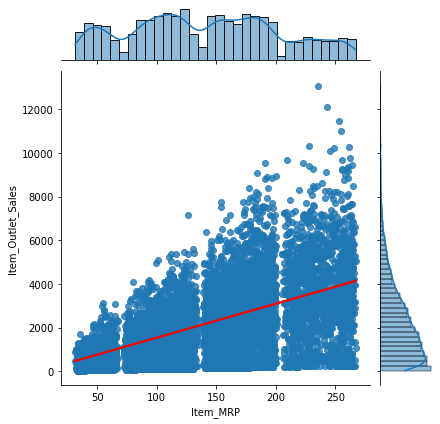

In [67]:
sns.jointplot(data=data,x='Item_MRP',y=target,kind='reg',joint_kws={'line_kws':{'color':'red'}})
plt.show()

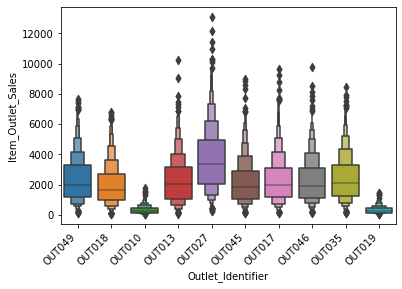

In [110]:
sns.boxenplot(data=data,y=target,x='Outlet_Identifier')
plt.xticks(rotation=45,ha='right')
plt.show()

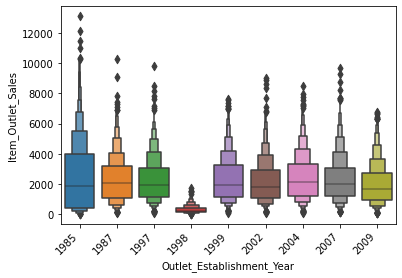

In [111]:
data['Outlet_Establishment_Year'] = data['Outlet_Establishment_Year'].astype('category') 

sns.boxenplot(data=data,y=target,x='Outlet_Establishment_Year')
plt.xticks(rotation=45,ha='right')
plt.show()

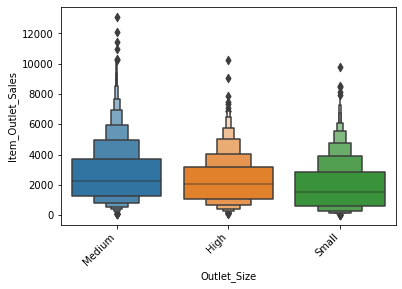

In [112]:
sns.boxenplot(data=data,y=target,x='Outlet_Size')
plt.xticks(rotation=45,ha='right')
plt.show()

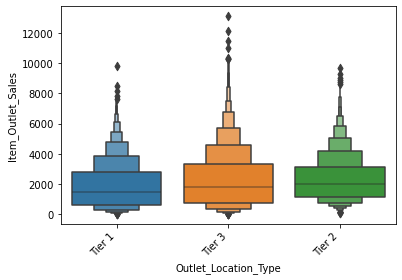

In [113]:
sns.boxenplot(data=data,y=target,x='Outlet_Location_Type')
plt.xticks(rotation=45,ha='right')
plt.show()

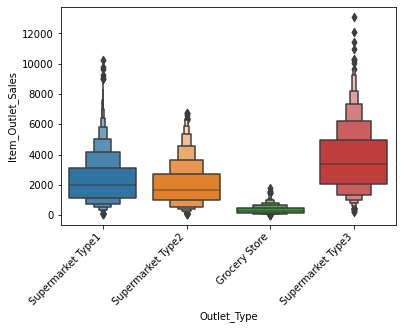

In [114]:
sns.boxenplot(data=data,y=target,x='Outlet_Type')
plt.xticks(rotation=45,ha='right')
plt.show()

False